In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1.1. Import the data from the file weights.tsv into a Pandas Series object in Python.
weights = pd.read_csv('weights.tsv',delimiter='\t',header=None)
print(weights)

      0
0   164
1   158
2   172
3   153
4   144
5   156
6   189
7   163
8   134
9   159
10  143
11  176
12  177
13  162
14  141
15  151
16  182
17  185
18  171
19  152


In [3]:
#1.2 Create a new series object with weights converted to kilograms from pounds 
#(1 pound = 0.453592 kilograms). Round the results to two decimal places.
weights_kg = weights[0] * 0.453592
print(weights_kg)

0     74.389088
1     71.667536
2     78.017824
3     69.399576
4     65.317248
5     70.760352
6     85.728888
7     73.935496
8     60.781328
9     72.121128
10    64.863656
11    79.832192
12    80.285784
13    73.481904
14    63.956472
15    68.492392
16    82.553744
17    83.914520
18    77.564232
19    68.945984
Name: 0, dtype: float64


In [4]:
#1.3 Find the mean, median, and standard deviation of both series objects using
# Pandas functions.

weights_desc    = ["Lbs.",weights.mean()[0], weights.median()[0], weights.std()[0]]
weights_kg_desc = ["Kg.",weights_kg.mean(),weights_kg.median(), weights_kg.std()]
descs = pd.DataFrame([weights_desc,weights_kg_desc],columns=["Unit","Mean","Median","Std.Dev"])
print(descs)

   Unit        Mean      Median    Std.Dev
0  Lbs.  161.600000  160.500000  15.449067
1   Kg.   73.300467   72.801516   7.007573


(array([1., 3., 0., 3., 3., 3., 2., 2., 1., 2.]), array([60.781328, 63.276084, 65.77084 , 68.265596, 70.760352, 73.255108,
       75.749864, 78.24462 , 80.739376, 83.234132, 85.728888]), <BarContainer object of 10 artists>)


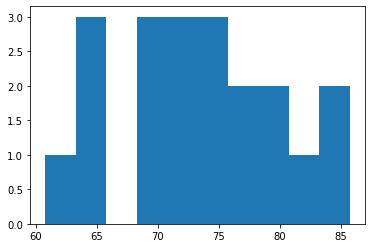

In [5]:
#1.4. Plot a histogram of weight (in kilograms) using matplotlib library with 10 bins.
print(plt.hist(weights_kg,bins=10))

In [6]:
#2.1. Import the dataset “boston.csv” into a Pandas dataframe and obtain the number
#of rows and columns for the dataframe.
boston = pd.read_csv('boston.csv')

In [7]:
print("Number of columns:" + str(len(boston.columns)))
print("number of rows:" + str(len(boston)))

Number of columns:13
number of rows:506


In [8]:
#2.2 What is the owner-occupied home value (MEDV) for the lowest nitric oxide
#concentration (NOX) from the dataframe?
i = boston.idxmin(axis=0)['NOX']
boston.iloc[i]['MEDV']

20.1

C:\Users\filipp\miniconda3\envs\ADS500B\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


IQR: 3.5950374999999997


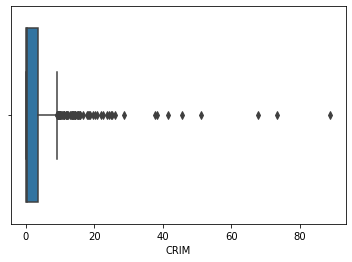

In [143]:
#2.3 Create a boxplot of per capita crime rate (CRIM) using Matplotlib. Obtain the
#interquartile range for crime rate (CRIM) using Pandas functions.

#plt.boxplot(boston['CRIM'])
q1 = boston['CRIM'].quantile(0.25)
q3 = boston['CRIM'].quantile(0.75)
IQR = q3 - q1
sns.boxplot(boston['CRIM'])
print("IQR: "+ str(IQR))

In [10]:
# 2.4 Subset all columns of the dataframe for rows with outliers of crime rate into a new
# dataframe. Compare the averages of AGE between the two dataframes with
# respect to crime rate, what do you interpret?

thresh = 1.5 * IQR
boston_outliers = boston[(boston['CRIM'] < q1*1.5) | (boston['CRIM']>q3*1.5)]
boston_non_outliers = boston[(boston['CRIM'] >= q1*1.5) & (boston['CRIM'] <= q3*1.5)]

print("Avg. Age","Avg. Crime Rate")
print(boston_outliers['AGE'].mean(),boston_outliers['CRIM'].mean(),)
print(boston_non_outliers['AGE'].mean(),boston_non_outliers['CRIM'].mean())

#analysis: 
#the data frame containing outliers has a lower age but a higher average crime rate, which means that 
#younger neighborhoods tend to experience more crime than neighborhoods whose housing units are,
#on net, older.

Avg. Age Avg. Crime Rate
63.78489208633093 5.64144226618705
74.41535087719299 1.1408858333333334


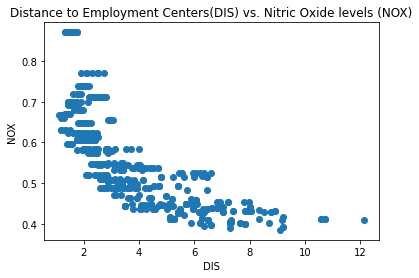

In [11]:
#2.5. Create scatterplot between distances to employment centers (DIS) and nitric
# oxide levels (NOX). Obtain correlation index between the two columns and
# interpret their relation.

plt.scatter(boston['DIS'],boston['NOX'])
plt.title("Distance to Employment Centers(DIS) vs. Nitric Oxide levels (NOX)")
plt.ylabel("NOX")
plt.xlabel("DIS")
plt.show()

In [18]:
#the distance to an employment center exhibits a strong negative correlation with the level
#of nitric oxide levels in a given area. That is, an increase of the distance to an employment 
#center by 1% is associated with a 0.769% decrease in NOX levels.
np.corrcoef(boston['DIS'],boston['NOX'])[0][1]

-0.7692301132258279

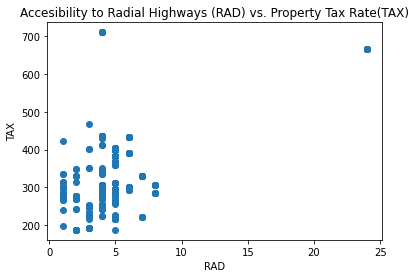

0.9102281885331874


In [24]:
#2.6. Similarly, create a scatterplot between highway accessibility index (RAD) and
# property tax rate (TAX). Obtain correlation index, compare it to the scatter-plot
# and interpret the relation between RAD and TAX. Take appropriate action on the
# data based on your observation. 
plt.scatter(boston['RAD'],boston['TAX'])
plt.title("Accesibility to Radial Highways (RAD) vs. Property Tax Rate(TAX)")
plt.ylabel("TAX")
plt.xlabel("RAD")
plt.show()

#interpretation: the dataset exhibits a very strong positive correlation coefficient of around 0.90, 
#which is notably stronger than that of the previous dataset. On face value, the scatter
#plot suggests a much weaker correlation. This can be interpeted to mean that a one percent increase 
#in access to radial highways is associated with a 0.91% increase in the property tax per $10,000.

#action: because the relationship goes both ways, we can also interpret this dataset as 
#providing evidence that property tax rates move similarly to access to radial highways.
#as a result, we may have some evidence to assert that lower-taxed neighborhoods have less
#access to highways. Further analysis would be required to confirm that there is a relationship
#between the property tax rate and the expected income of an area; if this is the case, we can
#start taking broad steps towards addressing a lack of accessibility for lower-income neighborhoods.

print(np.corrcoef(boston['RAD'],boston['TAX'])[0][1])

In [26]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
#3.1. Calculate percentage of tip amounts for bill totals, rounded to two decimal places
# and create a new column “tip_percent” in the same dataframe.

tips_df['tip_percent'] = round(tips_df['tip']/tips_df['total_bill'],2)
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15


In [43]:
#3.2 For what days in the week do we have the data, and which day on average has
#the highest bill? (Hint: lookup for “groupby” in pandas documentation)
unique_days = (tips_df['day'].unique())
print(unique_days)

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']


In [71]:
grouped = tips_df.groupby(['day'])['total_bill'].mean()

In [74]:
#day on average with highest bill
grouped.idxmax()

'Sun'

In [140]:
# 3.3 Are there more dinners or lunches? Create a dataframe with this data. Are there
# more smokers during lunches or dinners? Create another dataframe with this
# data. Join the two dataframes by time of day and calculate the percent of
# smokers at lunch and dinner. Compare the results.

#are there more dinners or lunches?
time_grp = pd.DataFrame(tips_df.groupby(['time'])['total_bill'].count())
time_grp.columns = ['customers']

print("most dining times: " + time_grp.idxmax())

customers    most dining times: Dinner
dtype: object


In [138]:
#more smokers during lunches or dinners? 
tips_df_smokers = tips_df[tips_df['smoker']=='Yes']
smokers_grp = pd.DataFrame(tips_df_smokers.groupby(['time'])['total_bill'].count())
smokers_grp.columns = ['smokers']

print('most smokers: ' + smokers_grp.idxmax())

smokers    most smokers: Dinner
dtype: object


In [142]:
#merge the two data frames together and calculate the perccentage of smokers for each time.
smokers_by_time = pd.merge(time_grp,smokers_grp,on='time')
smokers_by_time['percent_smokers'] = smokers_by_time['smokers']/smokers_by_time['customers']
smokers_by_time

#conclusion: there is a significantly large percentage of smokers during dinnertime.

,customers,smokers,percent_smokers
time,,,
Lunch,68,23,0.338235
Dinner,176,70,0.397727


<AxesSubplot:xlabel='tip', ylabel='sex'>

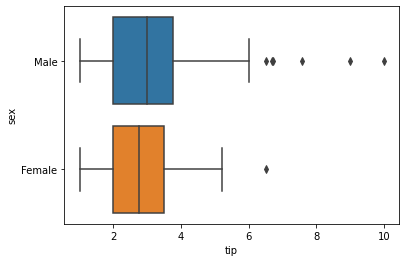

In [153]:
# 3.4 Using the boxplot function from seaborn package, create plots on “tip” column for
# Male and Female from “sex” column. Compare the boxplots and provide your
# interpretation on outliers between males and females. 

#interpretation: female tipping patterns exhibit a smaller spread and interquartile range
#as well as fewer outliers. Male tipping data shows a slight negative skew.
#we can interpret the difference between outliers to be that males in this dataset have
#a propensity to tip larger amounts. However, this analysis might be moot if those tips
#were for meals with a higher ticket amount.

sns.boxplot(y=tips_df['sex'],x=tips_df['tip'])

<AxesSubplot:xlabel='tip_percent', ylabel='sex'>

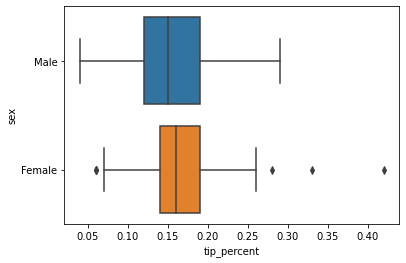

In [157]:
# 3.5 Create the same boxplots as above for “tip_percent” and “sex”, for tip percent
# below 70. Now compare the boxplots between male and female, which boxplot
# has more outliers and which one is more symmetric?

tips_df_below_70 = tips_df[tips_df['tip_percent']< 0.7]
sns.boxplot(y=tips_df_below_70['sex'],x=tips_df_below_70['tip_percent'])
#analysis: female median tipping percent is higher than male tipping percent with a smaller inter
#quartile range, but more outliers. both datasets exhibit positive skew.
#on face value, the female distribution seems to be more symmetric.

In [158]:
# 4. For this last problem statement, you will work on the “avocado.csv” dataset which
# contains information related to avocado sales across multiple regions/cities over the
# years 2015 to 2018 organised by date. The data contains 10 columns which are self
# explanatory.

In [418]:
# 4.1. Import the dataset file into a Pandas dataframe and identify the count of missing
# values per column. Handle missing values based on column type and explain
# your reasons behind selecting appropriate techniques.

avocado = pd.read_csv('avocado.csv')

#count of missing values:
avocado.isnull().sum()

Date            176
AveragePrice    184
TotalVolume     192
Small           194
Large           178
AllSizes        184
TotalBags       184
Type            204
Year            196
Region          169
dtype: int64

In [419]:
#we handle missing year data by manipulating the date value and vice verse.
#when interpolating the date value, we default to january 1st.
#this leaves us with two rows that have no date or year, which we can drop, since 
#we have no way of extrapolating their date value.

avocado['Year'] = avocado.apply(
    lambda row: str(row['Date'])[0:4] 
    if (pd.isna(row['Year']) & (pd.isna(row['Date'])==False))
    else row['Year'],
    axis=1
)
avocado['Date'] = avocado.apply(
    lambda row: str(int(row['Year']))+'-01-01' 
    if (pd.isna(row['Date']) & (pd.isna(row['Year'])==False))
    else row['Date'],
    axis=1
)

avocado = avocado[avocado['Year'].notna()]
avocado.isnull().sum()

Date              0
AveragePrice    184
TotalVolume     192
Small           194
Large           178
AllSizes        184
TotalBags       184
Type            204
Year              0
Region          169
dtype: int64

In [420]:
#region interpolation: a cursory analysis shows that most missing values are located between
#identical regions, so we will use a forward fill. 
avocado['Region'] = avocado['Region'].fillna(method='ffill')

#average price interpolation: type seems to be a differentiating factor in determining price.
#organic avocados tend to have a higher average price, so  we will interpolate with the average
# of average prices. conversely, we can also approximate what type a sale is based on the 
#average price.

#price interpolation
avocado['AveragePrice'] = avocado.apply(
    lambda row: avocado[(avocado['Type']==row['Type'])]['AveragePrice'].mean() 
    if (pd.isna(row['AveragePrice']) & (pd.isna(row['Type'])==False))
    else row['AveragePrice'],
    axis=1
)

In [421]:
avg_p_conv = avocado[avocado['Type']=='conventional']['AveragePrice'].mean()
avg_p_org  = avocado[avocado['Type']=='organic']['AveragePrice'].mean()

def guessType(avPrice):
    if abs(avPrice-avg_p_conv) <= abs(avPrice-avg_p_org):
        return 'conventional'
    else:
        return 'organic'

#type interpolation: we deduce the type based on average price and drop all other rows.

avocado['Type'] = avocado.apply(
    lambda row: guessType(row['AveragePrice'])
    if (pd.isna(row['Type']) & (pd.isna(row['AveragePrice'])==False))
    else row['Type'],
    axis=1
)

avocado = avocado[avocado['Type'].notna()]

In [422]:
avocado.isnull().sum()

Date              0
AveragePrice      0
TotalVolume     192
Small           194
Large           178
AllSizes        184
TotalBags       184
Type              0
Year              0
Region            0
dtype: int64

In [423]:
#Interpolating Total volume, small, large, allsizes, and totalbags:
#these five values make up an equation where tv = s + l + al + tb
# as a result, we can iterate through each value and solve for it, provided
# the other four values aren't null. otherwise, we may consider dropping them.

avocado['TotalVolume'] = avocado.apply(
    lambda row: row[['Small','Large','AllSizes','TotalBags']].sum()
    if (
        pd.isna(row['TotalVolume'])  & 
        (row[['Small','Large','AllSizes','TotalBags']].isna().any()==False)
       )
    else row['TotalVolume'],
    axis=1
)

avocado['Small'] = avocado.apply(
    lambda row: row['TotalVolume'] - row[['Large','AllSizes','TotalBags']].sum()
    if (
        pd.isna(row['Small'])  & 
        (row[['TotalVolume','Large','AllSizes','TotalBags']].isna().any()==False)
       )
    else row['Small'],
    axis=1
)

avocado['Large'] = avocado.apply(
    lambda row: row['TotalVolume'] - row[['Small','AllSizes','TotalBags']].sum()
    if (
        pd.isna(row['Large'])  & 
        (row[['TotalVolume','Small','AllSizes','TotalBags']].isna().any()==False)
       )
    else row['Large'],
    axis=1
)

avocado['AllSizes'] = avocado.apply(
    lambda row: row['TotalVolume'] - row[['Small','Large','TotalBags']].sum()
    if (
        pd.isna(row['AllSizes'])  & 
        (row[['TotalVolume','Small','Large','TotalBags']].isna().any()==False)
       )
    else row['AllSizes'],
    axis=1
)

avocado['TotalBags'] = avocado.apply(
    lambda row: row['TotalVolume'] - row[['Small','AllSizes','Large']].sum()
    if (
        pd.isna(row['TotalBags'])  & 
        (row[['TotalVolume','Small','AllSizes','Large']].isna().any()==False)
       )
    else row['TotalBags'],
    axis=1
)
avocado.isnull().sum()

Date             0
AveragePrice     0
TotalVolume      7
Small            5
Large            6
AllSizes        10
TotalBags       10
Type             0
Year             0
Region           0
dtype: int64

In [428]:
#because of the negligible number of remaining null values, we can justify dropping them.
avocado = avocado.dropna()

In [429]:
avocado.isnull().sum()

Date            0
AveragePrice    0
TotalVolume     0
Small           0
Large           0
AllSizes        0
TotalBags       0
Type            0
Year            0
Region          0
dtype: int64

In [433]:
# 4.2. Convert the fields Type, Year and Region to categorical data type and subset the
# dataframe to exclude region “TotalUS” and sort the dataframe by date in
# ascending order. Is the average price of an avocado higher in 2017 compared to
# 2016?

#subset to exclude totalUS
avocado = avocado[avocado["Region"] != "TotalUS"]
avocado.tail()

,Date,AveragePrice,TotalVolume,Small,Large,AllSizes,TotalBags,Type,Year,Region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,organic,2018,WestTexNewMexico


In [435]:
avocado['Type']  = pd.Categorical(avocado['Type'])
avocado['Year']  = pd.Categorical(avocado['Year'])
avocado['Region']= pd.Categorical(avocado['Region'])

In [438]:
sorted_avocado = avocado.sort_values('Date',ascending=True)
sorted_avocado.head()

,Date,AveragePrice,TotalVolume,Small,Large,AllSizes,TotalBags,Type,Year,Region
2124,2015-01-01,1.14,405013.16,137425.32,216791.05,11561.59,39235.20,conventional,2015,Sacramento
10491,2015-01-01,1.70,4352.18,459.53,3564.95,0.00,327.70,organic,2015,Nashville
2111,2015-01-01,1.26,403793.79,110289.47,232223.44,12830.34,48450.54,conventional,2015,Sacramento
9225,2015-01-01,1.44,7665.70,1565.49,4210.72,0.00,1889.49,organic,2015,Atlanta
10062,2015-01-01,1.31,10598.30,4797.41,57.91,0.00,5742.98,organic,2015,Houston


In [444]:
#avg price of avocado in 2016 vs 2017
price_2016 = avocado[(avocado['Year']=="2016")]['AveragePrice'].mean()
price_2017 = avocado[(avocado['Year']=="2017")]['AveragePrice'].mean()
if (price_2016 > price_2017):
    print ("The price of an avocado in 2016 is greater than in 2017")
else:
    print ("The price of an avocado in 2016 is smaller than in 2017")

The price of an avocado in 2016 is smaller than in 2017


In [469]:
# 4.3 Sum up the total volume of avocado sales by region and create a horizontal bar
# plot using Matplotlib. Which state from the region has the highest sales of
# avocados by volume? Subset the data for that state, create a histogram of
# average price and interpret it. Obtain the correlation index between average price
# and total volume for that state, what do you find?

by_region = pd.DataFrame(sorted_avocado.groupby(['Region'])['TotalVolume'].sum())

<AxesSubplot:ylabel='Region'>

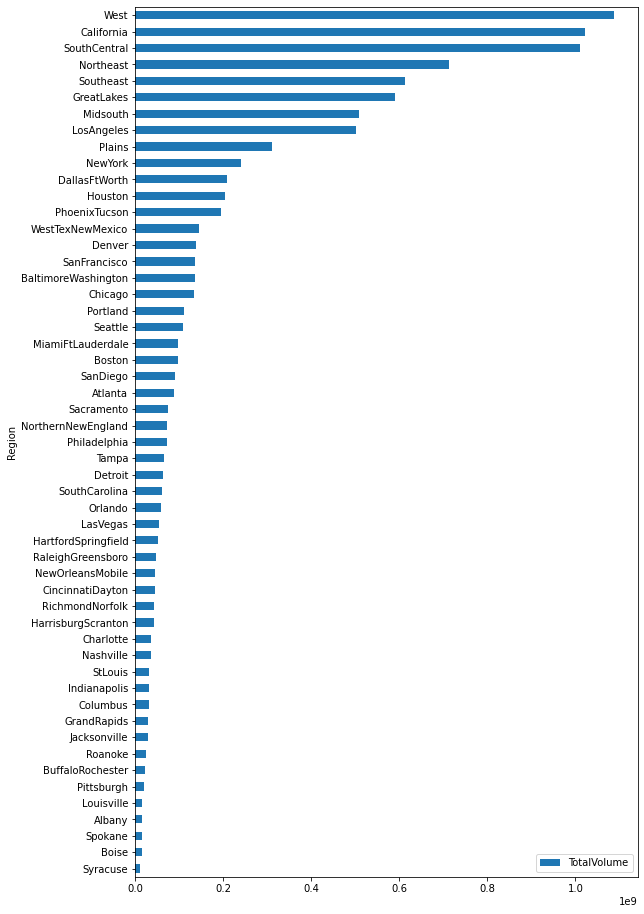

In [474]:

# Figure Size 
by_region = by_region.sort_values('TotalVolume')
by_region.plot(kind='barh',figsize=(9,16))

In [493]:
#technically speaking, "West" is the state with the most total volume.
#Although this isn't a state, we will proceed with subsetting anyway.

avocado_top_vol = avocado[avocado["Region"]==by_region.idxmax()[0]]

#create a histogram for average price
#correlation between average price and total volume 

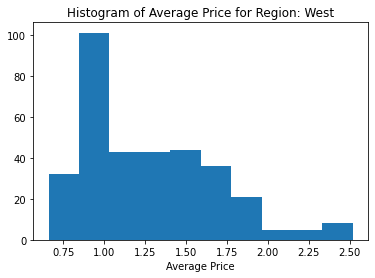

In [498]:
plt.hist(avocado_top_vol['AveragePrice'])
plt.xlabel("Average Price")
plt.title("Histogram of Average Price for Region: West")
plt.show()

#data exhibits positive skew with a unimoda distribution, where the most frequent
#average price occurs at around the $1 mark, and some outliers in the $2-$2.50 range.
#however, based on the size of the tail, we can conclude that the distribution is not normal.

In [501]:
np.corrcoef(avocado_top_vol['AveragePrice'],avocado_top_vol['TotalVolume'])[0][1]
#the data exhibits a negative correlation between the average price and total volume that is
#significant enough to be considered strong. The interpretation for this correlation is that
#a one percent increase in average price is associated with a 0.75 percent drop in total volume.
#this largely coincides with an intuitive understanding of the law of supply and demand, wherein
#increasing the price of a good decreases the demand for it.

-0.7566954418706449

In [ ]:
#4.4. Provide you observations of the following timeline plot of avocado sales by
# volume. Which month consistently has the highest volume of sales every year? In
# general, what could be some possible reasons driving this surge in sales? (2
# points)

#on face value, it appears that february is the consistently highest-volume month for every year.
#this could be attributed to a decrease in prices, or some seasonal component of growing avocados 
#where it becomes much easier to farm them around february.